In [ ]:
  #@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Simón Cortés Ocampo
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



In [ ]:
x = sp.symbols('x')

puntos = [(0,np.sin(0)),(np.pi/2,np.sin(np.pi/2)),(np.pi,np.sin(np.pi))]

x_vals = [p[0] for p in puntos]
y_vals = [p[1] for p in puntos]

polinomio_lagrange = []

for i in range(len(puntos)):
  L_i = 1
  for j in range(len(puntos)):
    if i != j:
      L_i *= (x - x_vals[j])/(x_vals[i] - x_vals[j])

  polinomio_lagrange.append(L_i)

polinomio_final = sum(L_i * y_vals[i] for i, L_i in enumerate(polinomio_lagrange))
sp.simplify (polinomio_final)

L_0 = sp.lambdify(x, polinomio_lagrange[0]*y_vals[0])
L_1 = sp.lambdify(x, polinomio_lagrange[1]*y_vals[1])
L_2 = sp.lambdify(x, polinomio_lagrange[2]*y_vals[2])
P = sp.lambdify(x, polinomio_final)


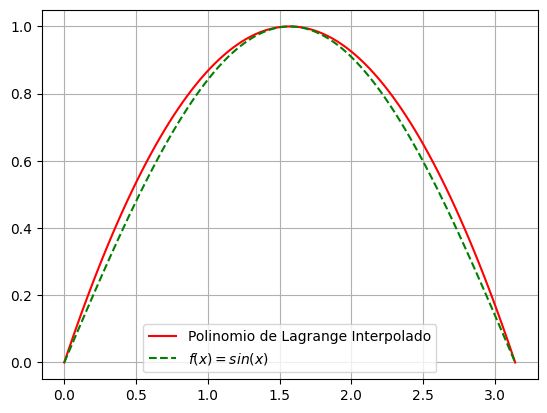

In [ ]:
x_ = np.linspace(0,np.pi,100)

plt.plot(x_, P(x_), 'r-', label = 'Polinomio de Lagrange Interpolado')
plt.plot(x_, np.sin(x_), 'g--', label = '$f(x)=sin(x)$')
plt.legend()
plt.grid(True)
plt.show()

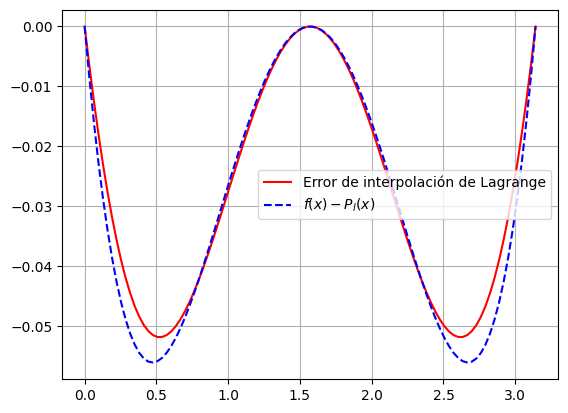

In [ ]:
#Error de Lagrange

def error(xi, x0, x1, x2,f):
  R_n = f(xi)/(4*3*2*1) * (xi-x0)*(xi-x1)*(xi-x2)
  return R_n

Error = [error(xi, 0, np.pi/2, np.pi, lambda x : -np.cos(x)) for xi in x_]
Error_real = np.sin(x_) - P(x_)

plt.plot(x_, Error, 'r-', label = 'Error de interpolación de Lagrange')
plt.plot(x_, Error_real,'b--', label = '$f(x)-P_l(x)$')
plt.plot()
plt.legend()
plt.grid(True)
plt.show()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [ ]:
from scipy.interpolate import CubicHermiteSpline

df = lambda x: np.cos(x)
df_vals = df(x_vals)

polinomio_hermite = CubicHermiteSpline(x_vals, y_vals, df_vals)

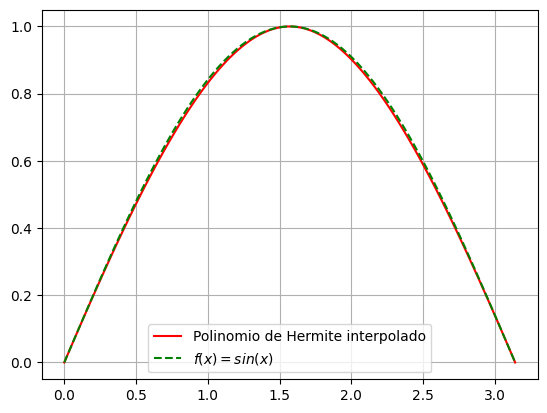

In [ ]:
x = np.linspace(0,np.pi,100)

plt.plot(x, polinomio_hermite(x), 'r-', label='Polinomio de Hermite interpolado')
plt.plot(x, np.sin(x), 'g--', label='$f(x)=sin(x)$')
plt.legend()
plt.grid(True)
plt.show()

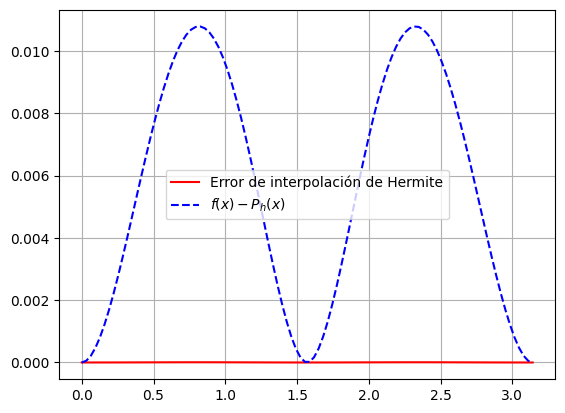

In [ ]:
#Error de Hermite

def error_hermite(xi,x0,x1,x2,f):
  R_n_h = f(xi)/(8*7*6*5*4*32*1) * (xi-x0)**2 * (xi-x1)**2 * (xi-x2)**2
  return R_n_h

error_hermite_ = [error_hermite(xi, 0, np.pi/2, np.pi, lambda x : np.sin(x)) for xi in x]
error_hermite_real = np.sin(x) - polinomio_hermite(x)

plt.plot(x, error_hermite_, 'r-', label = 'Error de interpolación de Hermite')
plt.plot(x, error_hermite_real, 'b--', label = '$f(x)-P_h(x)$')
plt.legend()
plt.grid(True)
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
def int_lagrange(x_,y_):
  x = sp.symbols('x')
  P_final = 0
  polinomio_lagrange = []
  for i in range(len(x_)):
    l_i = 1
    for j in range(len(x_)):
      if i != j:
        l_i *= (x-x_[j])/(x_[i]-x_[j])

    P_final += l_i * y_[i]
  Pl = sp.lambdify(x, P_final,'numpy')
  return Pl

def diferencias_divididas(x,y):
  n = len(x)
  coef = np.zeros(n)
  tabla = np.zeros((len(x),len(x)))
  tabla[:,0] = y
  coef = [tabla[0,0]]
  for j in range(1,n):
    for i in range(n-j):
      tabla[i,j] = (tabla[i+1,j-1]-tabla[i,j-1])/(x[i+j]-x[i])
    coef.append(tabla[0,j])
  return tabla, coef

def int_newton(x,coef,y):
  n = len(x)
  z = sp.symbols('z')
  p=coef[0]
  for i in range(1,n):
    termino = coef[i]
    for j in range(i):
      termino *= (z-sp.simplify(x[j]))
    p += termino
  Pn = sp.lambdify(z,p, 'numpy')
  return Pn


In [ ]:
def sigma_E(E, E_r, sigma_0, T):
  sigma_E = sigma_0 / ((E-E_r)**2 + (T**2)/4)
  return sigma_E

def sigma_0(Energia, sigma_E, E_r=78, gamma=55):
  promedio = 0
  for i in range(len(Energia)):
    promedio += sigma_E[i] * ((Energia[i]-E_r)**2 + (gamma**2)/4)
  sigma_0 = promedio/len(Energia)
  return sigma_0


In [ ]:
#Interpolaciones

x = sp.symbols('x')

Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

Lagrange = int_lagrange(Energia, sigma_exp)
P_L = sp.expand(Lagrange(x))

tabla, coef = diferencias_divididas(Energia, sigma_exp)
Newton = int_newton(Energia, coef, sigma_exp)
P_N = sp.expand(Newton(x))

def df(E, E_r = 78, sigma_0 = sigma_0(Energia, sigma_exp, E_r=78, gamma=55), T=55):
  df_E = ((E-E_r)*-2*sigma_0)/((T**2)/4 + (E-E_r)**2)**2
  return df_E
df_vals = df(Energia)
Hermite = CubicHermiteSpline(Energia, sigma_exp, df_vals)

sigma_0_valor = sigma_0(Energia, sigma_exp, E_r=78, gamma=55)
print(f'El valor de sigma, utilizando un promedio, es {sigma_0_valor}')

print(f'El polinomio de Lagrange es: {P_L}')
print(f'El polinomio de Newton es: {P_N}')


El valor de sigma, utilizando un promedio, es 67642.34861111111
El polinomio de Lagrange es: -1.1551695238095e-13*x**8 + 9.97636063492044e-11*x**7 - 3.54296888888882e-8*x**6 + 6.63147377777766e-6*x**5 - 0.000694254622222211*x**4 + 0.0395537377777772*x**3 - 1.09330293650792*x**2 + 11.4071380952379*x + 10.6
El polinomio de Newton es: -1.15516952380952e-13*x**8 + 9.97636063492061e-11*x**7 - 3.54296888888888e-8*x**6 + 6.63147377777777e-6*x**5 - 0.000694254622222221*x**4 + 0.0395537377777777*x**3 - 1.09330293650794*x**2 + 11.4071380952381*x + 10.6


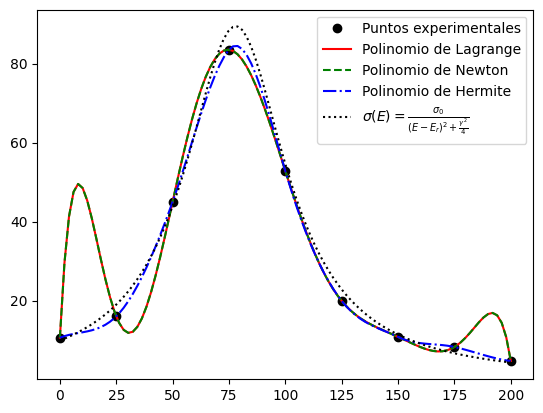

In [ ]:
E_vals = np.linspace(0,200,100)

plt.plot(Energia, sigma_exp, 'ko', label = 'Puntos experimentales')
plt.plot(E_vals, Lagrange(E_vals), 'r-', label = 'Polinomio de Lagrange')
plt.plot(E_vals, Newton(E_vals), 'g--', label = 'Polinomio de Newton')
plt.plot(E_vals, Hermite(E_vals), 'b-.', label = 'Polinomio de Hermite')
plt.plot(E_vals, sigma_E(E_vals,E_r = 78, sigma_0=67642.348, T=55 ), 'k:', label=r'$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2 + \frac{\gamma^2}{4}}$')
plt.legend()
plt.show()

In [ ]:
#Errores

error_lagrange_resta = np.abs(sigma_E(Energia, 78, sigma_0_valor,55) - Lagrange(Energia))
error_newton_resta = np.abs(sigma_E(Energia, 78, sigma_0_valor,55) - Newton(Energia))
error_hermite_resta = np.abs(sigma_E(Energia, 78, sigma_0_valor,55) - Hermite(Energia))

print(f'El error del método de Lagrange es: {error_lagrange_resta}')
print(f'El error del método de Newton es: {error_newton_resta}')
print(f'El error del método de Hermite es: {error_hermite_resta}')

El error del método de Lagrange es: [0.71112918 2.97268035 1.0835263  4.8924843  1.73928531 2.91168489
 0.58712152 1.595727   0.37511078]
El error del método de Newton es: [0.71112918 2.97268035 1.0835263  4.8924843  1.73928531 2.91168489
 0.58712152 1.595727   0.37511078]
El error del método de Hermite es: [0.71112918 2.97268035 1.0835263  4.8924843  1.73928531 2.91168489
 0.58712152 1.595727   0.37511078]


#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

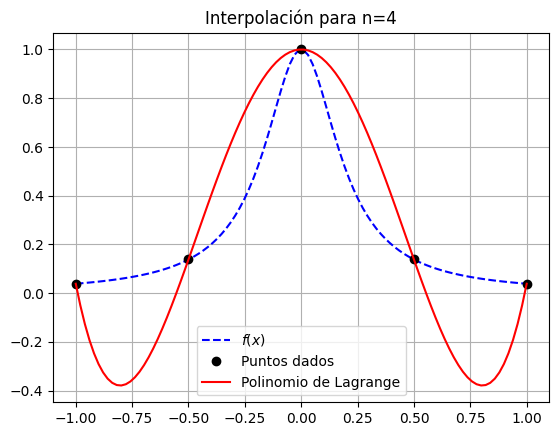

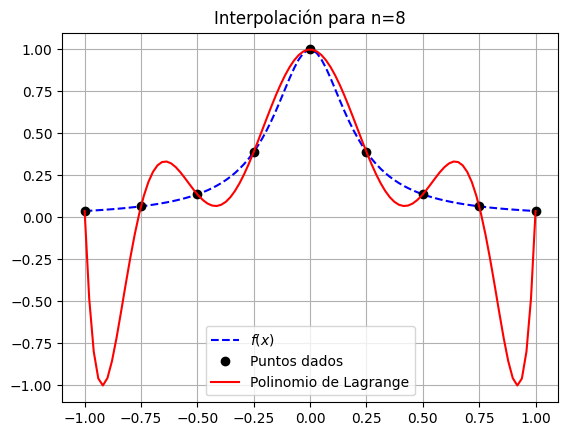

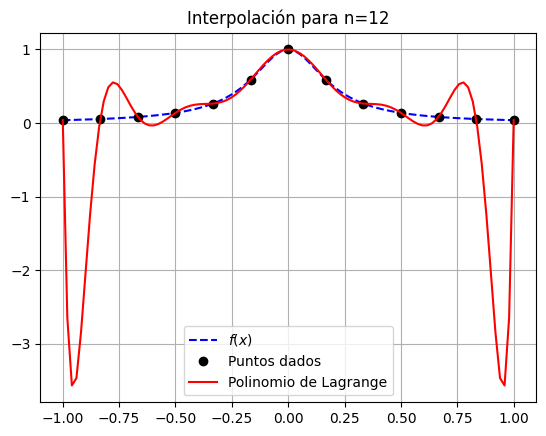

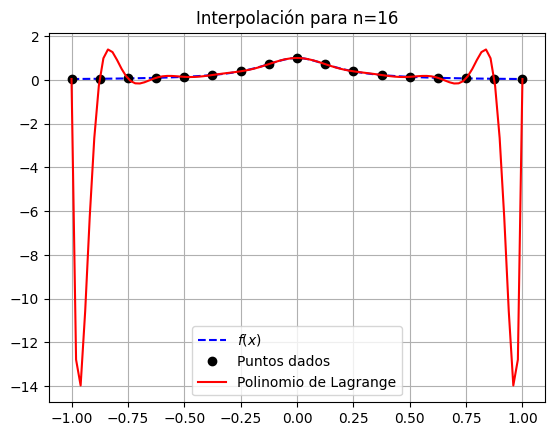

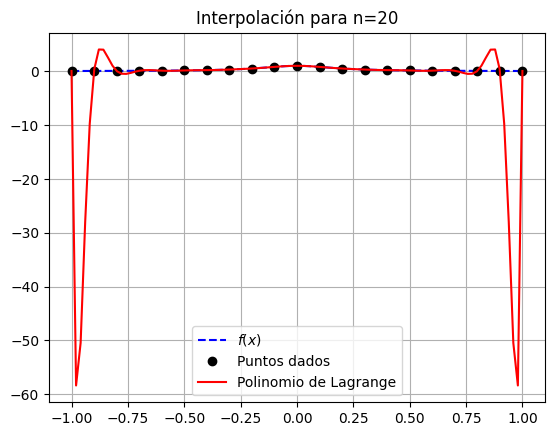

In [ ]:
f = lambda x: 1/(1+25*x**2)
x = np.linspace(-1,1,100)

N = [4,8,12,16,20]

for i in range(len(N)):
  n = N[i]

  x_vals = np.linspace(-1,1,n+1)
  poli_lagrange = int_lagrange(x_vals, f(x_vals))
  xi = np.linspace(np.min(x_vals), np.max(x_vals), 100)

  plt.title(f'Interpolación para n={N[i]}')
  plt.plot(x,f(x), 'b--', label = '$f(x)$')
  plt.plot(x_vals, f(x_vals), 'ko', label = 'Puntos dados')
  plt.plot(xi, poli_lagrange(xi), 'r-', label = 'Polinomio de Lagrange')
  plt.legend()
  plt.grid()
  plt.show()


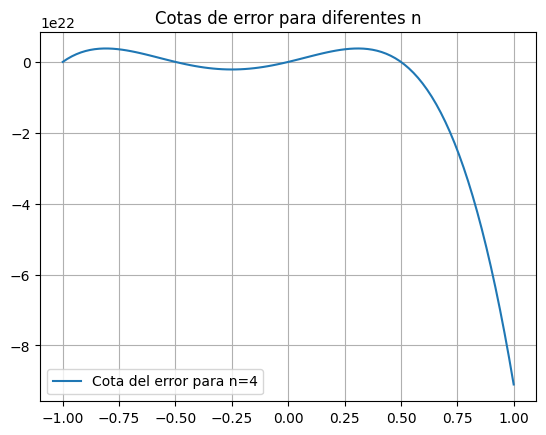

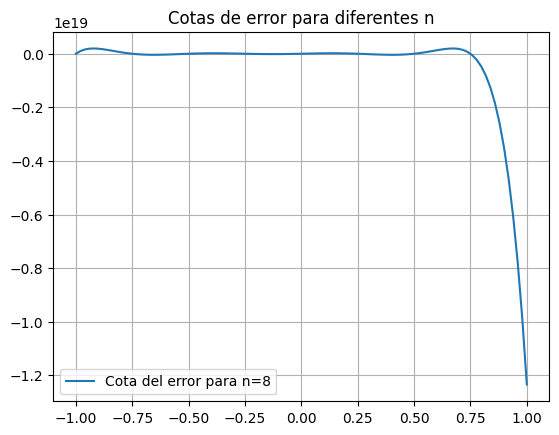

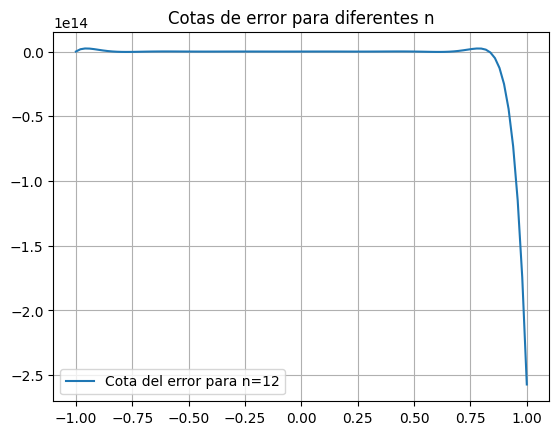

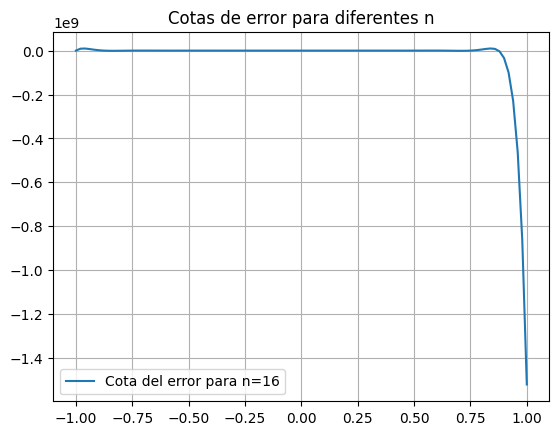

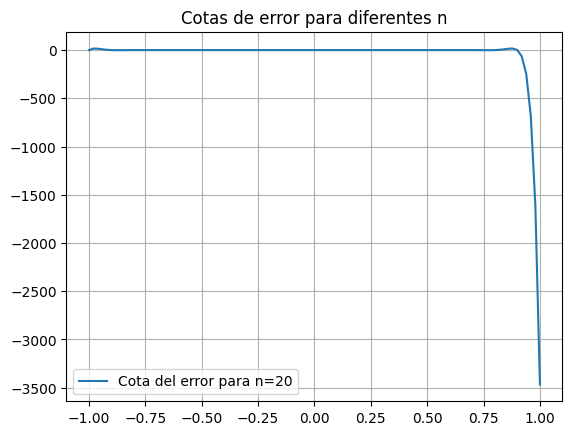

In [ ]:
#Errores

x = sp.symbols('x')
f = 1/(1+25*x**2)
df = sp.diff(f,x,n+1)

f_ = sp.lambdify(x,f)
df_ = sp.lambdify(x,df)

def error_(f_,df_,z,xi,n):
  e_1 = (df_(z)/sp.factorial(n+1))
  producto = 1
  for i in range(n):
    producto *= (x-xi[i])
  e = e_1 * producto
  error_func = sp.lambdify(x,e, 'numpy')
  return error_func

for i in range(len(N)):
  n = N[i]
  x_vals = np.linspace(-1,1,n+1)
  error_lagrange = error_(f_,df_,0.5,x_vals,n)
  xi = np.linspace(np.min(x_vals), np.max(x_vals), 100)
  plt.title(f'Cotas de error para diferentes n')
  plt.plot(xi, error_lagrange(xi), label = f'Cota del error para n={N[i]}')
  plt.legend()
  plt.grid()
  plt.show()

Efectivamente, se evidencia que a medida que n crece, el error también crece.

In [ ]:
#Estimación error en x=0.5 para n=4
n=4
x_nodes = np.linspace(-1,1,n+1)
x_sym = sp.symbols('x')
f_sym = 1 / (1 + 25 * x_sym**2)
f_deriv = sp.diff(f_sym, x_sym, n+1)
xi = sp.Symbol('xi')
error_cota = (1 / sp.factorial(n+1)) * f_deriv.subs(x_sym, xi)
product_term = sp.prod([(0.5 - x_nodes[i]) for i in range(n+1)])
error_estimado = error_cota * product_term
print("Cota del error estimada en x=0.5:", error_estimado)

Cota del error estimada en x=0.5: 0


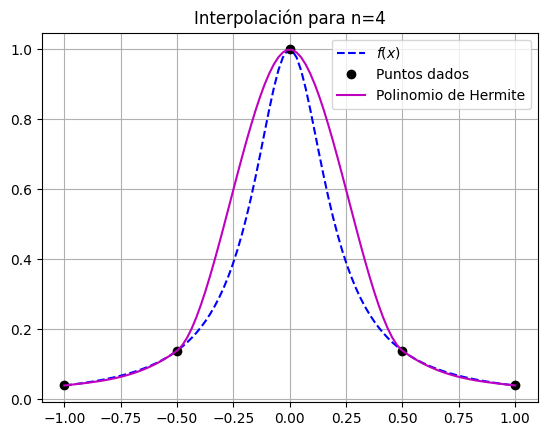

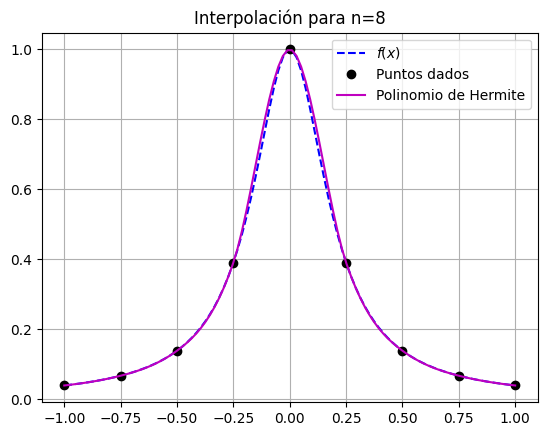

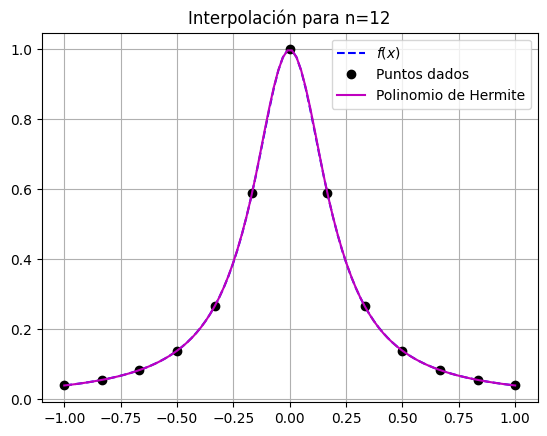

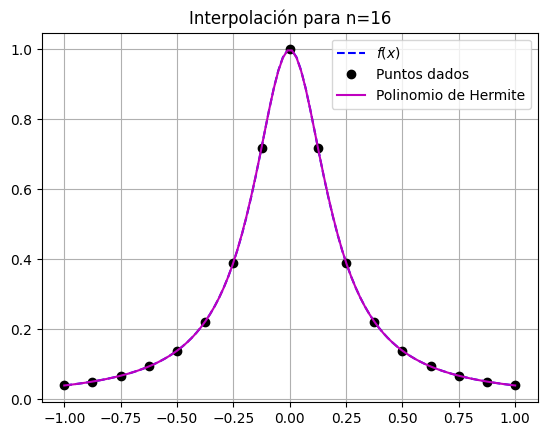

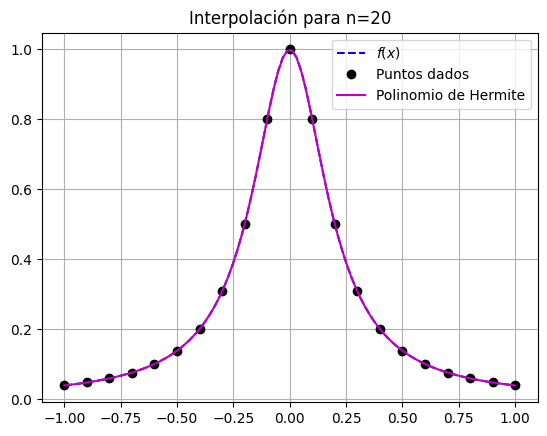

In [ ]:
#Hermite

from scipy.interpolate import CubicHermiteSpline

f = lambda x: 1/(1+25*x**2)
x = np.linspace(-1,1,100)
df = lambda x: -50*x/(1+25*x**2)**2
N = [4,8,12,16,20]

for i in range(len(N)):
  n = N[i]
  x_vals = np.linspace(-1,1,n+1)
  xi = np.linspace(np.min(x_vals), np.max(x_vals), 100)
  plt.title(f'Interpolación para n={N[i]}')
  plt.plot(x,f(x), 'b--', label = '$f(x)$')
  plt.plot(x_vals, f(x_vals), 'ko', label = 'Puntos dados')
  plt.plot(xi, CubicHermiteSpline(x_vals, f(x_vals), df(x_vals))(xi), 'm-', label = 'Polinomio de Hermite')
  plt.legend()
  plt.grid()
  plt.show()



La diferencia entre la interpolación de Lagrange y la de Hermite es que en la de Lagrange presenta oscilaciones entre puntos, lo que se debe al fenómeno de runge, mientras que la de Hermite no.

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



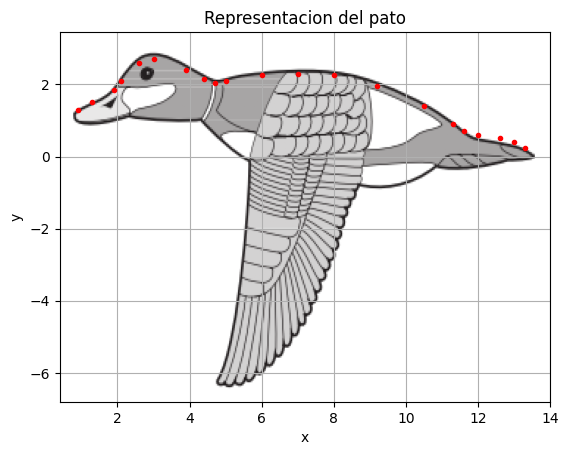

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

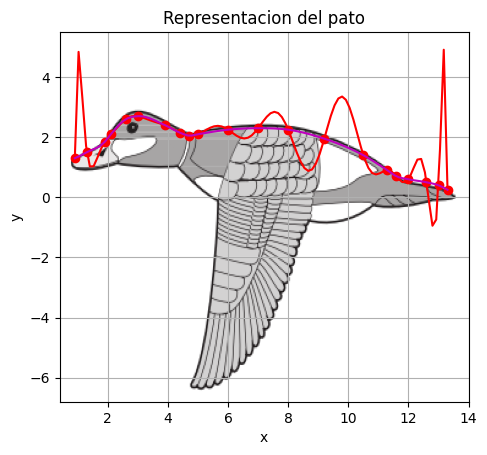

In [ ]:
from scipy.interpolate import CubicHermiteSpline

df_hermite = np.gradient(yp, xp, edge_order=2)

pato_interpolado_lagrange = int_lagrange(xp, yp)
pato_interpolado_hermite = CubicHermiteSpline(xp, yp, df_hermite)

xp_linspace = np.linspace(np.min(xp), np.max(xp), 100)

plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x y y
plt.plot(xp, yp, 'ro')
plt.plot(xp_linspace, pato_interpolado_lagrange(xp_linspace), 'r-')
plt.plot(xp_linspace, pato_interpolado_hermite(xp_linspace),'m-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

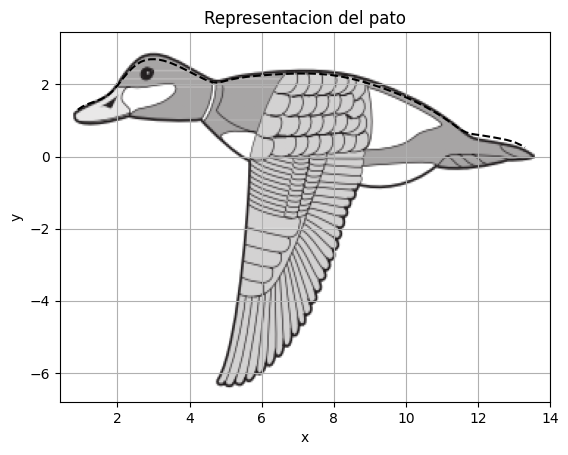

In [ ]:
from scipy.interpolate import CubicSpline

pato_interpolado_spline = CubicSpline(xp, yp)

plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x y y
plt.plot(xp_linspace, pato_interpolado_spline(xp_linspace), 'k--')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Tanto la interpolación de Hermite como la de splines cúbicos son a efectos prácticos iguales. La de Lagrange, sin embargo, presenta múltiples oscilaciones entre los puntos, lo que se debe al fenómeno de Runge.